In [ ]:
from pandas.tseries.offsets import YearEnd
# This code is highly apodted from Sait Celebi's code found here: http://saitcelebi.com/tut/output/part1.html
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
X = np.array(iris["data"][:, 2:])# petal length, petal width 

y = np.array((iris["target"] == 0).astype(np.int)) # 1 if Iris-Virginica, else 0
#Seperate out the testing data
X_test = [X[0], X[1], X[-1], X[-2]]
y_test = [y[0], y[1], y[-1], y[-2]]
X = X[2:148]
y = y[2:148]





150
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 

<ipython-input-52-9f4c490e6255>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.array((iris["target"] == 0).astype(np.int)) # 1 if Iris-Virginica, else 0


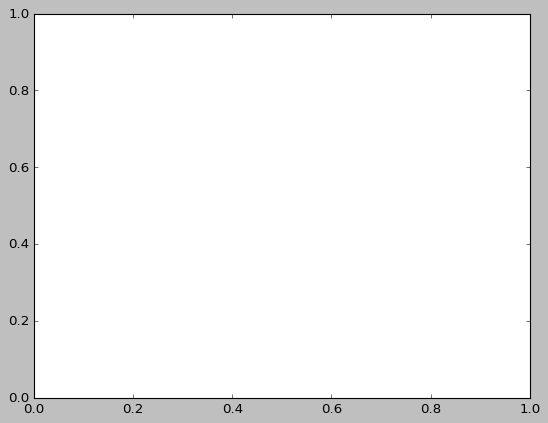

In [ ]:
plt.style.use('classic')
np.set_printoptions(precision=3, suppress=True)


colormap = np.array(['r', 'b'])

def plot_scatter(X, y, colormap, path):
  plt.grid()
  plt.xlim([0.0, 9.0])
  plt.ylim([0.0, 9.0])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Input 2D points', size=18)
  plt.scatter(X[:,0], X[:, 1], s=50, c=colormap[y])
  plt.savefig(path)

#plot is saved as image.png
plot_scatter(X, y, colormap, 'image.png')


plt.close()
plt.clf()
plt.cla()

In [ ]:
#Sigmoid function maps x to a value between 0-1
sigmoid = lambda x: 1/(1+np.exp(-x))

#Initial values as a starting point to imorove on using gradient desent
w = np.array([4, 4])   # some magical w
b = 1.99                      # some magical b
x = np.array([2, 4])     # point we want to classify

print(sigmoid(w.dot(x) + b))

0.9999999999948395


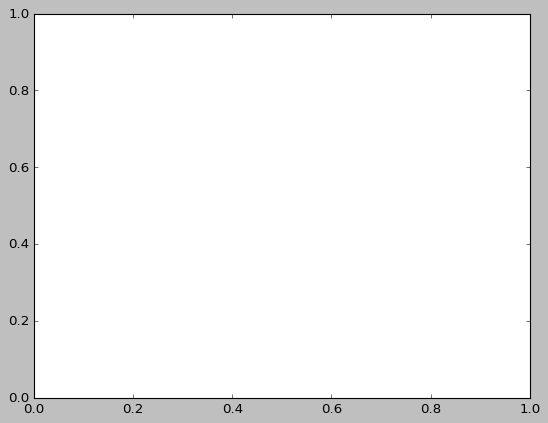

In [ ]:
LEARNING_RATE = 8.0
NUM_EPOCHS = 20

#loss function that we want to minimizes showing that the clasifier is accurate 
#when the loss function is 0 all points are correctly classified
def get_loss(y, a):
  return -1 * (y * np.log(a) +
               (1-y) * np.log(1-a))

#It's important to rewrite the loss function such that we deal with exponents instaed of logs
#which have floating point restrictions.
def get_loss_numerically_stable(y, z):
   return -1 * (y * -1 * np.log(1 + np.exp(-z)) +
                (1-y) * (-z - np.log(1 + np.exp(-z))))

w_cache = []
b_cache = []
l_cache = []

# some nice initial value, so that the plot looks nice.
w = np.array([4.0, 2.0])
b = 0.0

#Run through the data a set amount of times, calculate the total loss, use gradient desent to find which way to adjust the ws and b.
for i in range(NUM_EPOCHS):
  dw = np.zeros(w.shape)
  db = 0.0
  loss = 0.0

  for j in range(X.shape[0]):
    x_j = X[j,:]
    y_j = y[j]

    #calculate the z to be used in the sigmoid function
    z_j = w.dot(x_j) + b
    #find the sigmoid function
    a_j = sigmoid(z_j)
    #Finds loss at this specific point 
    loss_j = get_loss_numerically_stable(y_j, z_j)

    #find the two partial derivatives to be used to calculate the new w's and b
    dw_j = x_j * (a_j-y_j)
    db_j = a_j - y_j

    dw += dw_j
    db += db_j
    loss += loss_j

  # because we have len(x) samples we find the average partial derivative. 
  dw = (1.0/len(X)) * dw
  db = (1.0/len(X)) * db
  loss = (1.0/len(X)) * loss

  #finally, use the learning rate to calculate the final ws and b
  w -= LEARNING_RATE * dw
  b -= LEARNING_RATE * db

  w_cache.append(w.copy())
  b_cache.append(b)
  l_cache.append(loss)

plt.grid()
plt.title('Loss', size=18)
plt.xlabel('Number of iterations', size=15)
plt.ylabel('Loss', size=15)
plt.plot(l_cache)
#graph saved in loss.png
plt.savefig('loss.png')

plt.close()
plt.clf()
plt.cla()

In [ ]:
#Test using the testing data
for i in range(len(X_test)):
  #test the sigmoid function with the given weights the the Gradient desent model created
  if(sigmoid(X_test[i][0]*w[0]+X_test[i][1]*w[1]+b)<.5):
    print("Is 0 expecting " + str(y_test[i]))
  else:
    print("Is 1 expecting " + str(y_test[i]))
  print(sigmoid(X_test[i][0]*w[0]+X_test[i][1]*w[1]+b))
  print()

Is 1 expecting 1
0.9898146255777778

Is 1 expecting 1
0.9898146255777778

Is 0 expecting 0
4.960694786964789e-05

Is 0 expecting 0
3.91092597968839e-06

